# Projeto 5 - Churn de uma empresa de telecomunicações

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img19.png?raw=true" width="500" height="100"/>

Churn rate, ou simplesmente churn, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

Churn também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o churn rate é o que não desejamos.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.impute import *
from sklearn.base import *
from sklearn.compose import *
from functools import partial
from plotnine import *
from sklearn.inspection import *
import pickle
from yellowbrick.model_selection import FeatureImportances

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/fgiordanelli/Projeto1/main/Datasets/dataset5.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<img src="https://miro.medium.com/max/1400/1*o_lzFf8bQz6V5asznQcrjA.png" width="500" height="100"/>

## Ver o balanceamento da base de dados
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img2.png?raw=true" width="500" height="100"/>

In [10]:
total = df.groupby('Churn').agg(n = ('Churn','count')).reset_index()
total['perc'] = 100*total['n']/total['n'].sum()

In [11]:
total

,Churn,n,perc
0,No,5174,73.463013
1,Yes,1869,26.536987


# Ver se tem valores fora do padrão

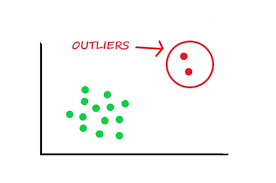

<AxesSubplot:>

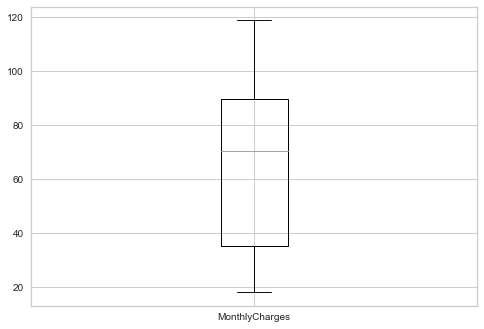

In [12]:
df[['MonthlyCharges']].boxplot()

## Separa em target e feature

<img src="https://miro.medium.com/max/1664/1*HQQPUO8whJzuQsyJaWZL_A.jpeg" width="300" height="100"/>

In [13]:
X = df.drop(columns = ['customerID','Churn']) 
y = df['Churn']

## Separar em treino e teste e a variável target das features
<img src="https://i.ibb.co/3csjYT2/image.png" width="400" height="100"/>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Tratar Valor Vazio

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img6.png?raw=true" width="400" height="150"/>

## Tratar variável numéricas (se tiverem medidas diferentes)

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img5.png?raw=true" width="350" height="100"/>

In [15]:
numeric_transformer = make_pipeline(SimpleImputer(strategy='median', missing_values=np.nan))

## Tratar variáveis categóricas

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img7.png?raw=true" width="600" height="100"/>

In [16]:
categorical_transformer = make_pipeline(SimpleImputer(strategy='constant', missing_values=np.nan),
                                        OneHotEncoder(handle_unknown='ignore')
                                       )

In [17]:
preprocessor = make_column_transformer(
        (numeric_transformer, ['SeniorCitizen', 'tenure', 'MonthlyCharges']),
        (categorical_transformer,['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                                   'PaperlessBilling', 'PaymentMethod', 'TotalCharges']))

In [18]:
preprocessor.fit_transform(X_train)

<4718x4515 sparse matrix of type '<class 'numpy.float64'>'
	with 85665 stored elements in Compressed Sparse Row format>

## Treinar o modelo com os principais algorítimos supervisionados de Classificação
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img8.png?raw=true" width="250" height="80"/>

In [19]:
LR = make_pipeline(preprocessor,LogisticRegression(solver='lbfgs', max_iter=1000))
#LDA = make_pipeline(preprocessor,LinearDiscriminantAnalysis())
CART = make_pipeline(preprocessor,DecisionTreeClassifier())
KNN = make_pipeline(preprocessor,KNeighborsClassifier())
SVM = make_pipeline(preprocessor,SVC(probability=True)) 
RF = make_pipeline(preprocessor,RandomForestClassifier()) 

# Separar em diversos treinos e testes - Validação Cruzada
<img src="https://miro.medium.com/max/800/1*kkMtezwv8qj1t9uG4nw_8g.png" width="400" height="100"/>

K-fold é o método de cross-validation mais conhecido e utilizado. O método consiste em dividir o dataset em k partes, usando k-1 partes para treino e a parte remanescente para teste, fazendo isso k vezes. Em cada uma das k vezes, testa-se o modelo com um fold diferente calculando a métrica escolhida para avaliação do modelo. Ao final do processo, teremos k medidas da métrica de avaliação escolhida, com as quais geralmente calculamos a média e o desvio-padrão.

In [20]:
custom_scorer = make_scorer(partial(precision_score, pos_label="No"))
scores_LR = pd.DataFrame(cross_validate(LR, X_train, y_train, cv=3,scoring = custom_scorer,return_train_score=True)).drop(columns = ['fit_time','score_time']).rename(columns = {'test_score':'LR'})
scores_CART = pd.DataFrame(cross_validate(CART, X_train, y_train, cv=3,scoring = custom_scorer,return_train_score=True)).drop(columns = ['fit_time','score_time']).rename(columns = {'test_score':'CART'})
scores_KNN = pd.DataFrame(cross_validate(KNN, X_train, y_train, cv=3,scoring = custom_scorer,return_train_score=True)).drop(columns = ['fit_time','score_time']).rename(columns = {'test_score':'KNN'})
scores_SVM = pd.DataFrame(cross_validate(SVM, X_train, y_train, cv=3,scoring = custom_scorer,return_train_score=True)).drop(columns = ['fit_time','score_time']).rename(columns = {'test_score':'SVM'})
scores_RF = pd.DataFrame(cross_validate(RF, X_train, y_train, cv=3,scoring = custom_scorer,return_train_score=True)).drop(columns = ['fit_time','score_time']).rename(columns = {'test_score':'RF'})

In [21]:
pd.concat([scores_LR,scores_DT,scores_KNN,scores_SVM,scores_RF],axis=1).boxplot()

NameError: name 'scores_DT' is not defined

In [ ]:
LR.fit(X_train,y_train)
CART.fit(X_train,y_train)
KNN.fit(X_train,y_train)
SVM.fit(X_train,y_train)
RF.fit(X_train,y_train)

## Feature Importance
<img src="https://www.scikit-yb.org/en/latest/_images/importances-1.png" width="350" height="40"/>

In [ ]:
result = permutation_importance(
    LR, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

In [ ]:
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots()
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx]
)
ax.set_title("Permutation Importances")
fig.tight_layout()
plt.show()

## Matriz de confusão + Métricas

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img14.png?raw=true" width="350" height="100"/>

In [ ]:
ConfusionMatrixDisplay.from_estimator(LR, X,y)
plt.show()

## Acurácia, Precision e Recall do Treino

In [ ]:
metricas = {'Accuracy':  [LR.score(X_train,y_train),
                          #LDA.score(X_train,y_train),
                          CART.score(X_train,y_train),
                          KNN.score(X_train,y_train),
                          SVM.score(X_train,y_train),
                          RF.score(X_train,y_train)],
            'Precision': [precision_score(y_train, LR.predict(X_train), pos_label = 'No'),
                          #precision_score(y_train, LDA.prediXct(X_train), pos_label = 0),
                          precision_score(y_train, CART.predict(X_train), pos_label = 'No'),
                          precision_score(y_train, KNN.predict(X_train), pos_label = 'No'),
                          precision_score(y_train, SVM.predict(X_train), pos_label = 'No'),
                          precision_score(y_train, RF.predict(X_train), pos_label = 'No')],
            'Recall' :   [recall_score(y_train, RF.predict(X_train), pos_label = 'No'),
                          #recall_score(y_train, LDA.predict(X_train), pos_label = 0),
                          recall_score(y_train, CART.predict(X_train), pos_label = 'No'),
                          recall_score(y_train, KNN.predict(X_train), pos_label = 'No'),
                          recall_score(y_train, SVM.predict(X_train), pos_label = 'No'),
                          recall_score(y_train, RF.predict(X_train), pos_label = 'No')]
        }

dados = pd.DataFrame(metricas, columns = ['Accuracy', 'Precision','Recall'], index=['LR','CART','KNN','SVM','RF'])

dados

## Curva ROC
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img15.png?raw=true" width="350" height="200"/>

In [ ]:
RocCurveDisplay.from_estimator(LR, X, y,drop_intermediate=False,ax=plt.gca(), name = 'LR')
#RocCurveDisplay.from_estimator(LDA, X_test, y_test,drop_intermediate=False,ax=plt.gca())
RocCurveDisplay.from_estimator(CART, X, y,drop_intermediate=False,ax=plt.gca(),name = 'CART')
RocCurveDisplay.from_estimator(KNN, X, y,drop_intermediate=False,ax=plt.gca(),name = 'KNN')
RocCurveDisplay.from_estimator(SVM, X, y,drop_intermediate=False,ax=plt.gca(),name = 'SVM')
RocCurveDisplay.from_estimator(RF, X, y,drop_intermediate=False,ax=plt.gca(),name = 'RF')

plt.show()

## Encapsular o modelo e Salvar

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img9.png?raw=true" width="200" height="80"/>

In [ ]:
pickle.dump(RF, open('Modelo_Churn.sav', 'wb'))

## Abrir modelo salvo

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img10.png?raw=true" width="300" height="100"/>

In [ ]:
loaded_model = pickle.load(open('Modelo_Churn.sav', 'rb'))

## Testar agora pro teste. Ver se houve overfitting

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img11.png?raw=true" width="150" height="80"/>

In [ ]:
print("Acurácia teste LR:", loaded_model.score(X_test, y_test))